
# <span style="color:rgb(213,80,0)">Surgical Unit data.</span>

This file creates Figures 4.30\-4.33.

## Beginning of code

In [1]:
close all;
clearvars;
load('hospitalFS.txt');
y=hospitalFS(:,5);
X=hospitalFS(:,1:4);

n=length(y);
prin=0;

## Prepare input for Figure 4.30

LMS using all subsamples (very lengthy)


In [2]:
computeLMSusingAllSubsets=false;
if computeLMSusingAllSubsets ==true
    nsamp=0;
    [outLXS]=LXS(y,X,'nsamp',nsamp);
else
    % best out of 111,469,176 subsets
    outLXS=struct;
    outLXS.bs= [ 3   11   20   23   74];
end

p=size(X,2)+1;

outFS=FSReda(y,X,outLXS.bs);

% Tranform minimum deletion residual from standard coordinates to normal
% coordinates
outFS1=FSRinvmdr(outFS,p);


## Create Figure 4.30


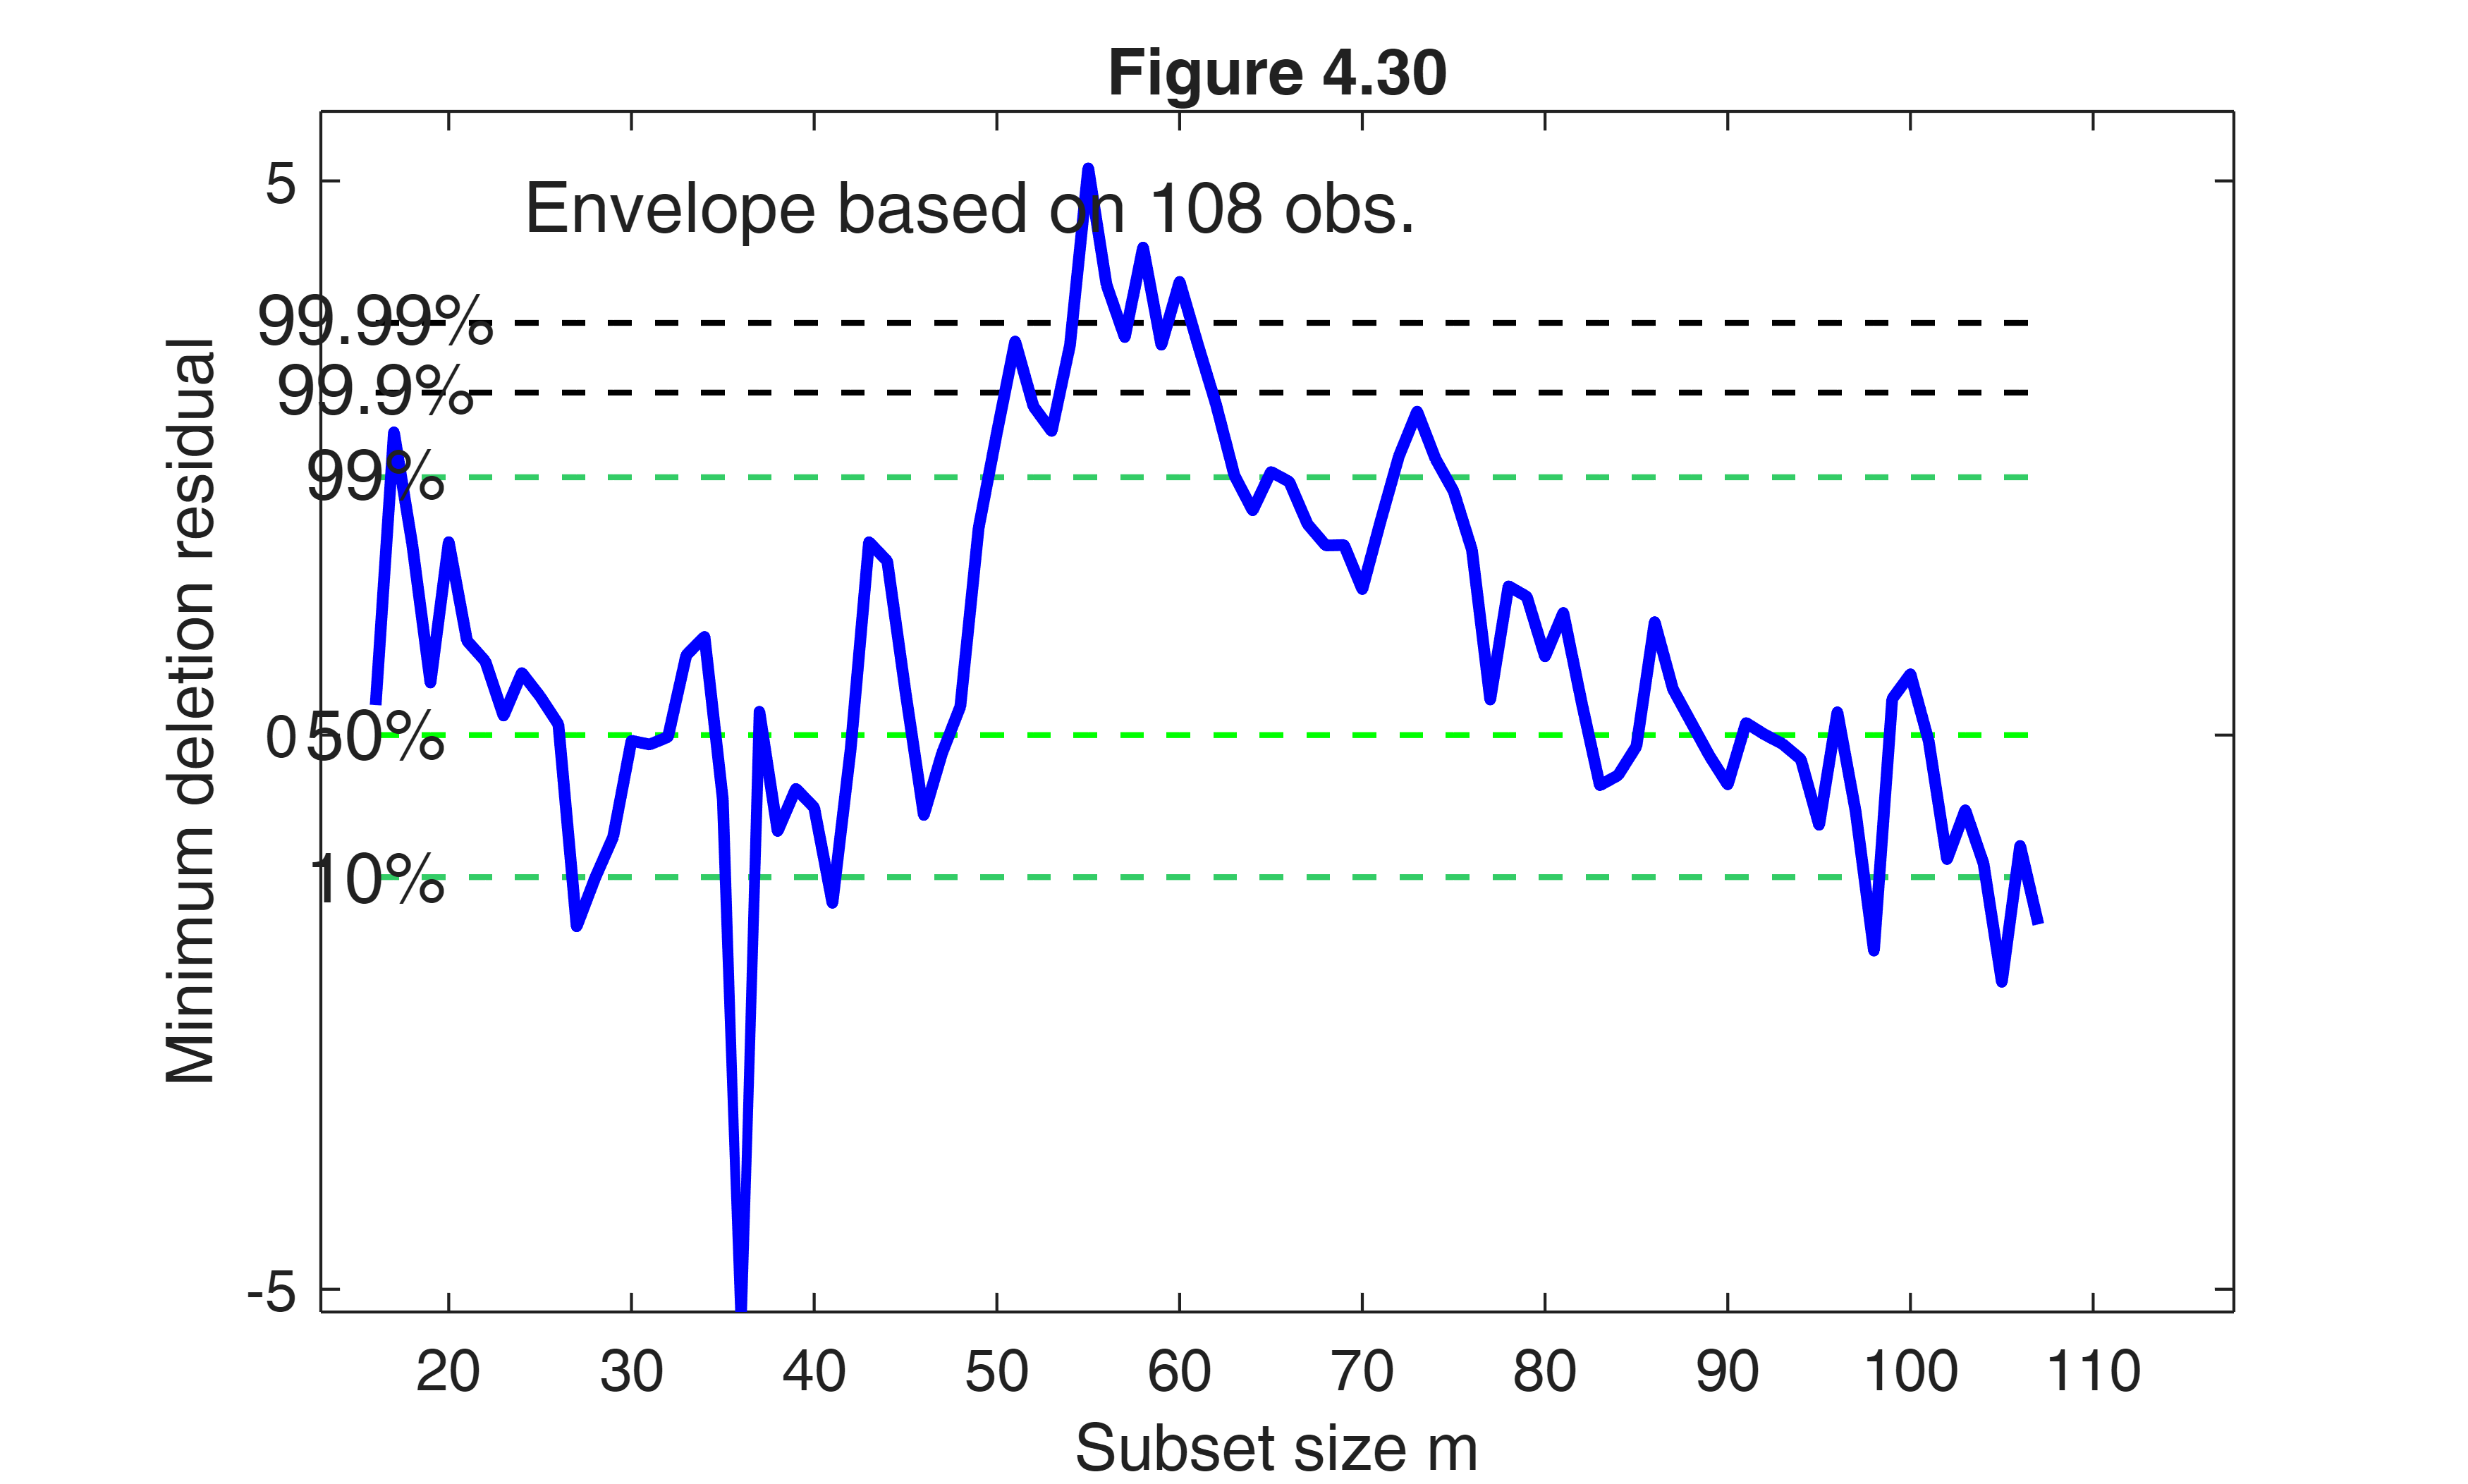

In [3]:
mdrplot(outFS1,'ncoord',true,'quant',[0.1 0.5 0.99 0.999 0.9999]);

if prin==1
    % print to postscript
    print -depsc SPmdrncoord.eps;
else
    title('Figure 4.30')
    set(gcf,"Name",'Figure 4.30')
end

## Create Figure

Automatic outlier detection


In [4]:
startJustSearchin1000Subsets=true;
if startJustSearchin1000Subsets ==true
    out=FSR(y,X,'plots',0);
else
    outLXS=struct;
    outLXS.bs= [ 3   11   20   23   74];
    [out]=FSR(y,X,'lms',outLXS.bs,'plots',0);
end

-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=55 because
rmin(55,108)>99.999%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=54
Superimposition stopped because r_{min}(55,63)>99.9% envelope
Subsample of 62 units is homogeneous
----------------------------
Final output
Number of units declared as outliers=46
Summary of the exceedances
1.00         99.00        999.00       9999.00      99999.00
             0         18.00          9.00          4.00          2.00

In [5]:
disp(out)

         ListOut: [5.00 9.00 22.00 27.00 28.00 30.00 37.00 38.00 39.00 43.00 54.00 55.00 56.00 57.00 59.00 62.00 63.00 67.00 68.00 70.00 72.00 73.00 74.00 75.00 76.00 77.00 78.00 80.00 81.00 82.00 83.00 84.00 85.00 86.00 89.00 90.00 … ] (1x46 double)
        outliers: [5.00 9.00 22.00 27.00 28.00 30.00 37.00 38.00 39.00 43.00 54.00 55.00 56.00 57.00 59.00 62.00 63.00 67.00 68.00 70.00 72.00 73.00 74.00 75.00 76.00 77.00 78.00 80.00 81.00 82.00 83.00 84.00 85.00 86.00 89.00 90.00 … ] (1x46 double)
             mdr: [92x2 double]
              Un: [92x11 double]
            nout: [2x5 double]
            beta: [5x1 double]
           scale: 0.02
    fittedvalues: [108x1 double]
       residuals: [108x1 double]
           class: 'FSR'


## Create Figure 4.31

SP data Monitoring of prop of units in bsb and tstat



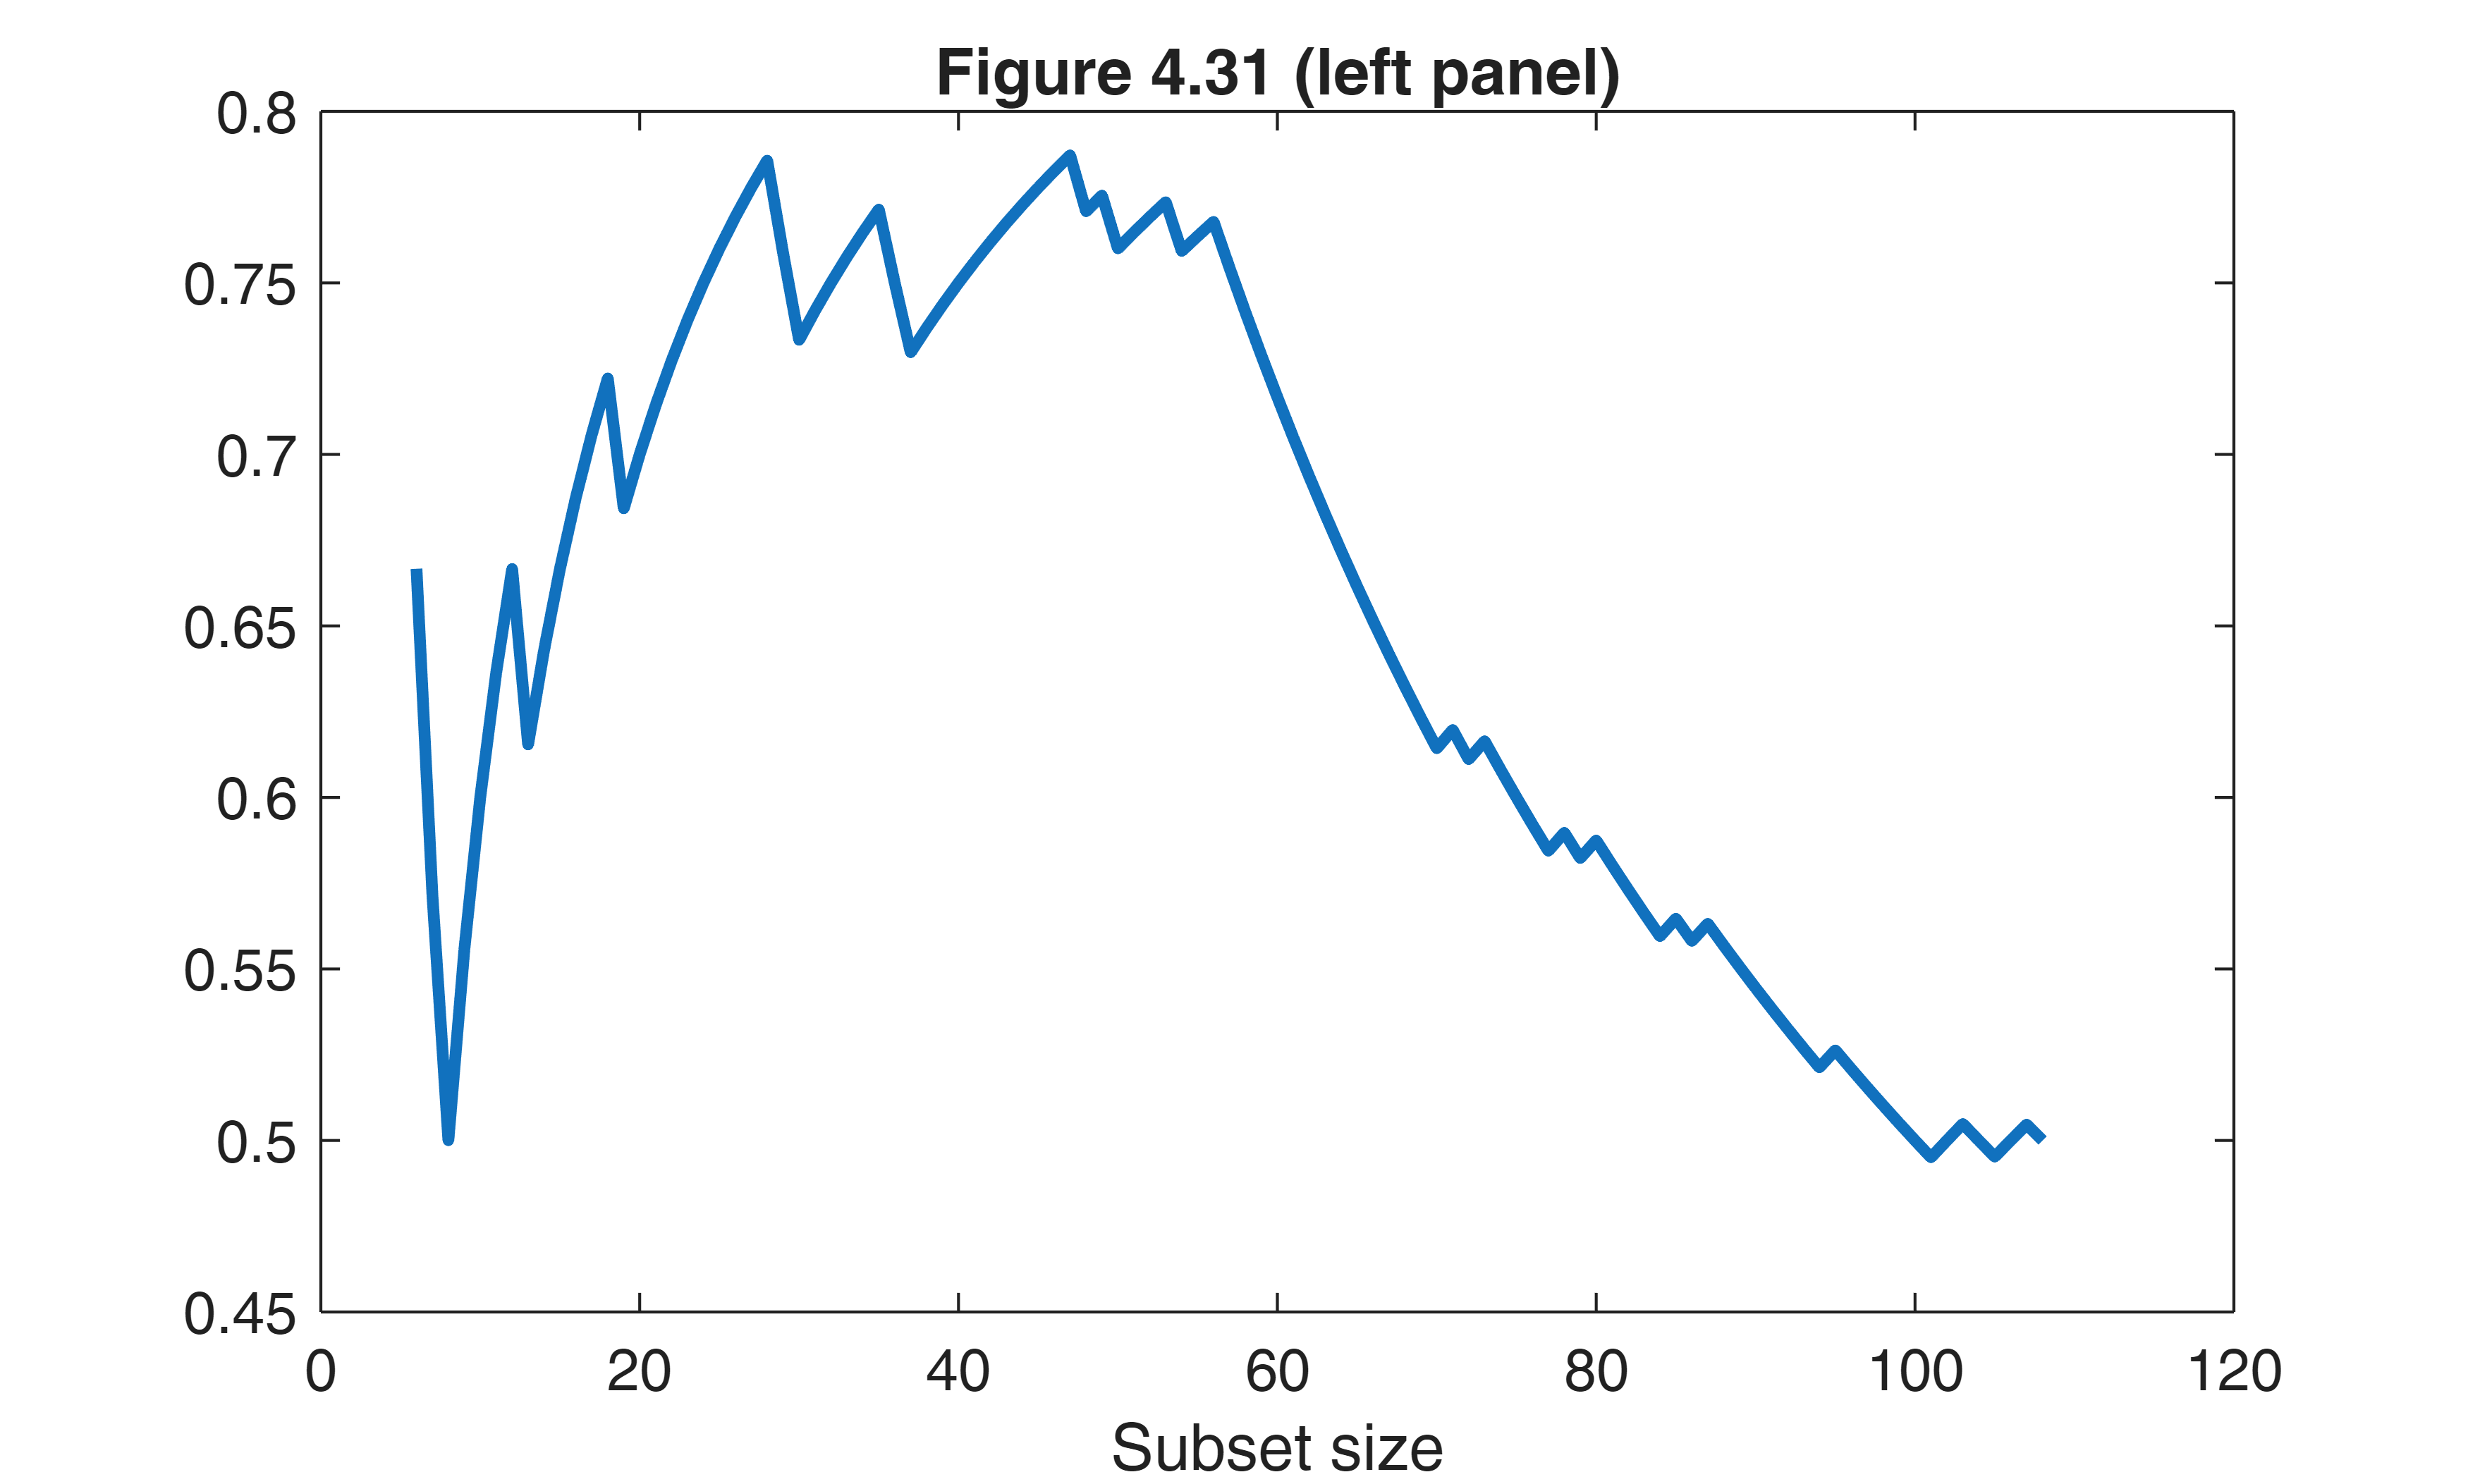

In [6]:
figure
nr=1;
nc=2;
Prop=[(p+1:n)' zeros(n-p,1)];
[Un,BB]=FSRbsb(y,X,outLXS.bs,'init',p+1,'bsbsteps',p+1:n);
for j=1:size(BB,2)
    bj=BB(:,j);
    bj=bj(~isnan(bj));
    Prop(j,2)=sum(bj<=54)/length(bj);
end

% subplot(nr,nc,1)
plot(Prop(:,1),Prop(:,2),'LineWidth',2)
xlabel('Subset size')

if prin==1
    print -depsc  SPtmonitor.eps
else
    title('Figure 4.31 (left panel)')
    set(gcf,"Name",'Figure 4.31 (left panel)')
end


## Create Figure 4.31 right panel

Forward Search



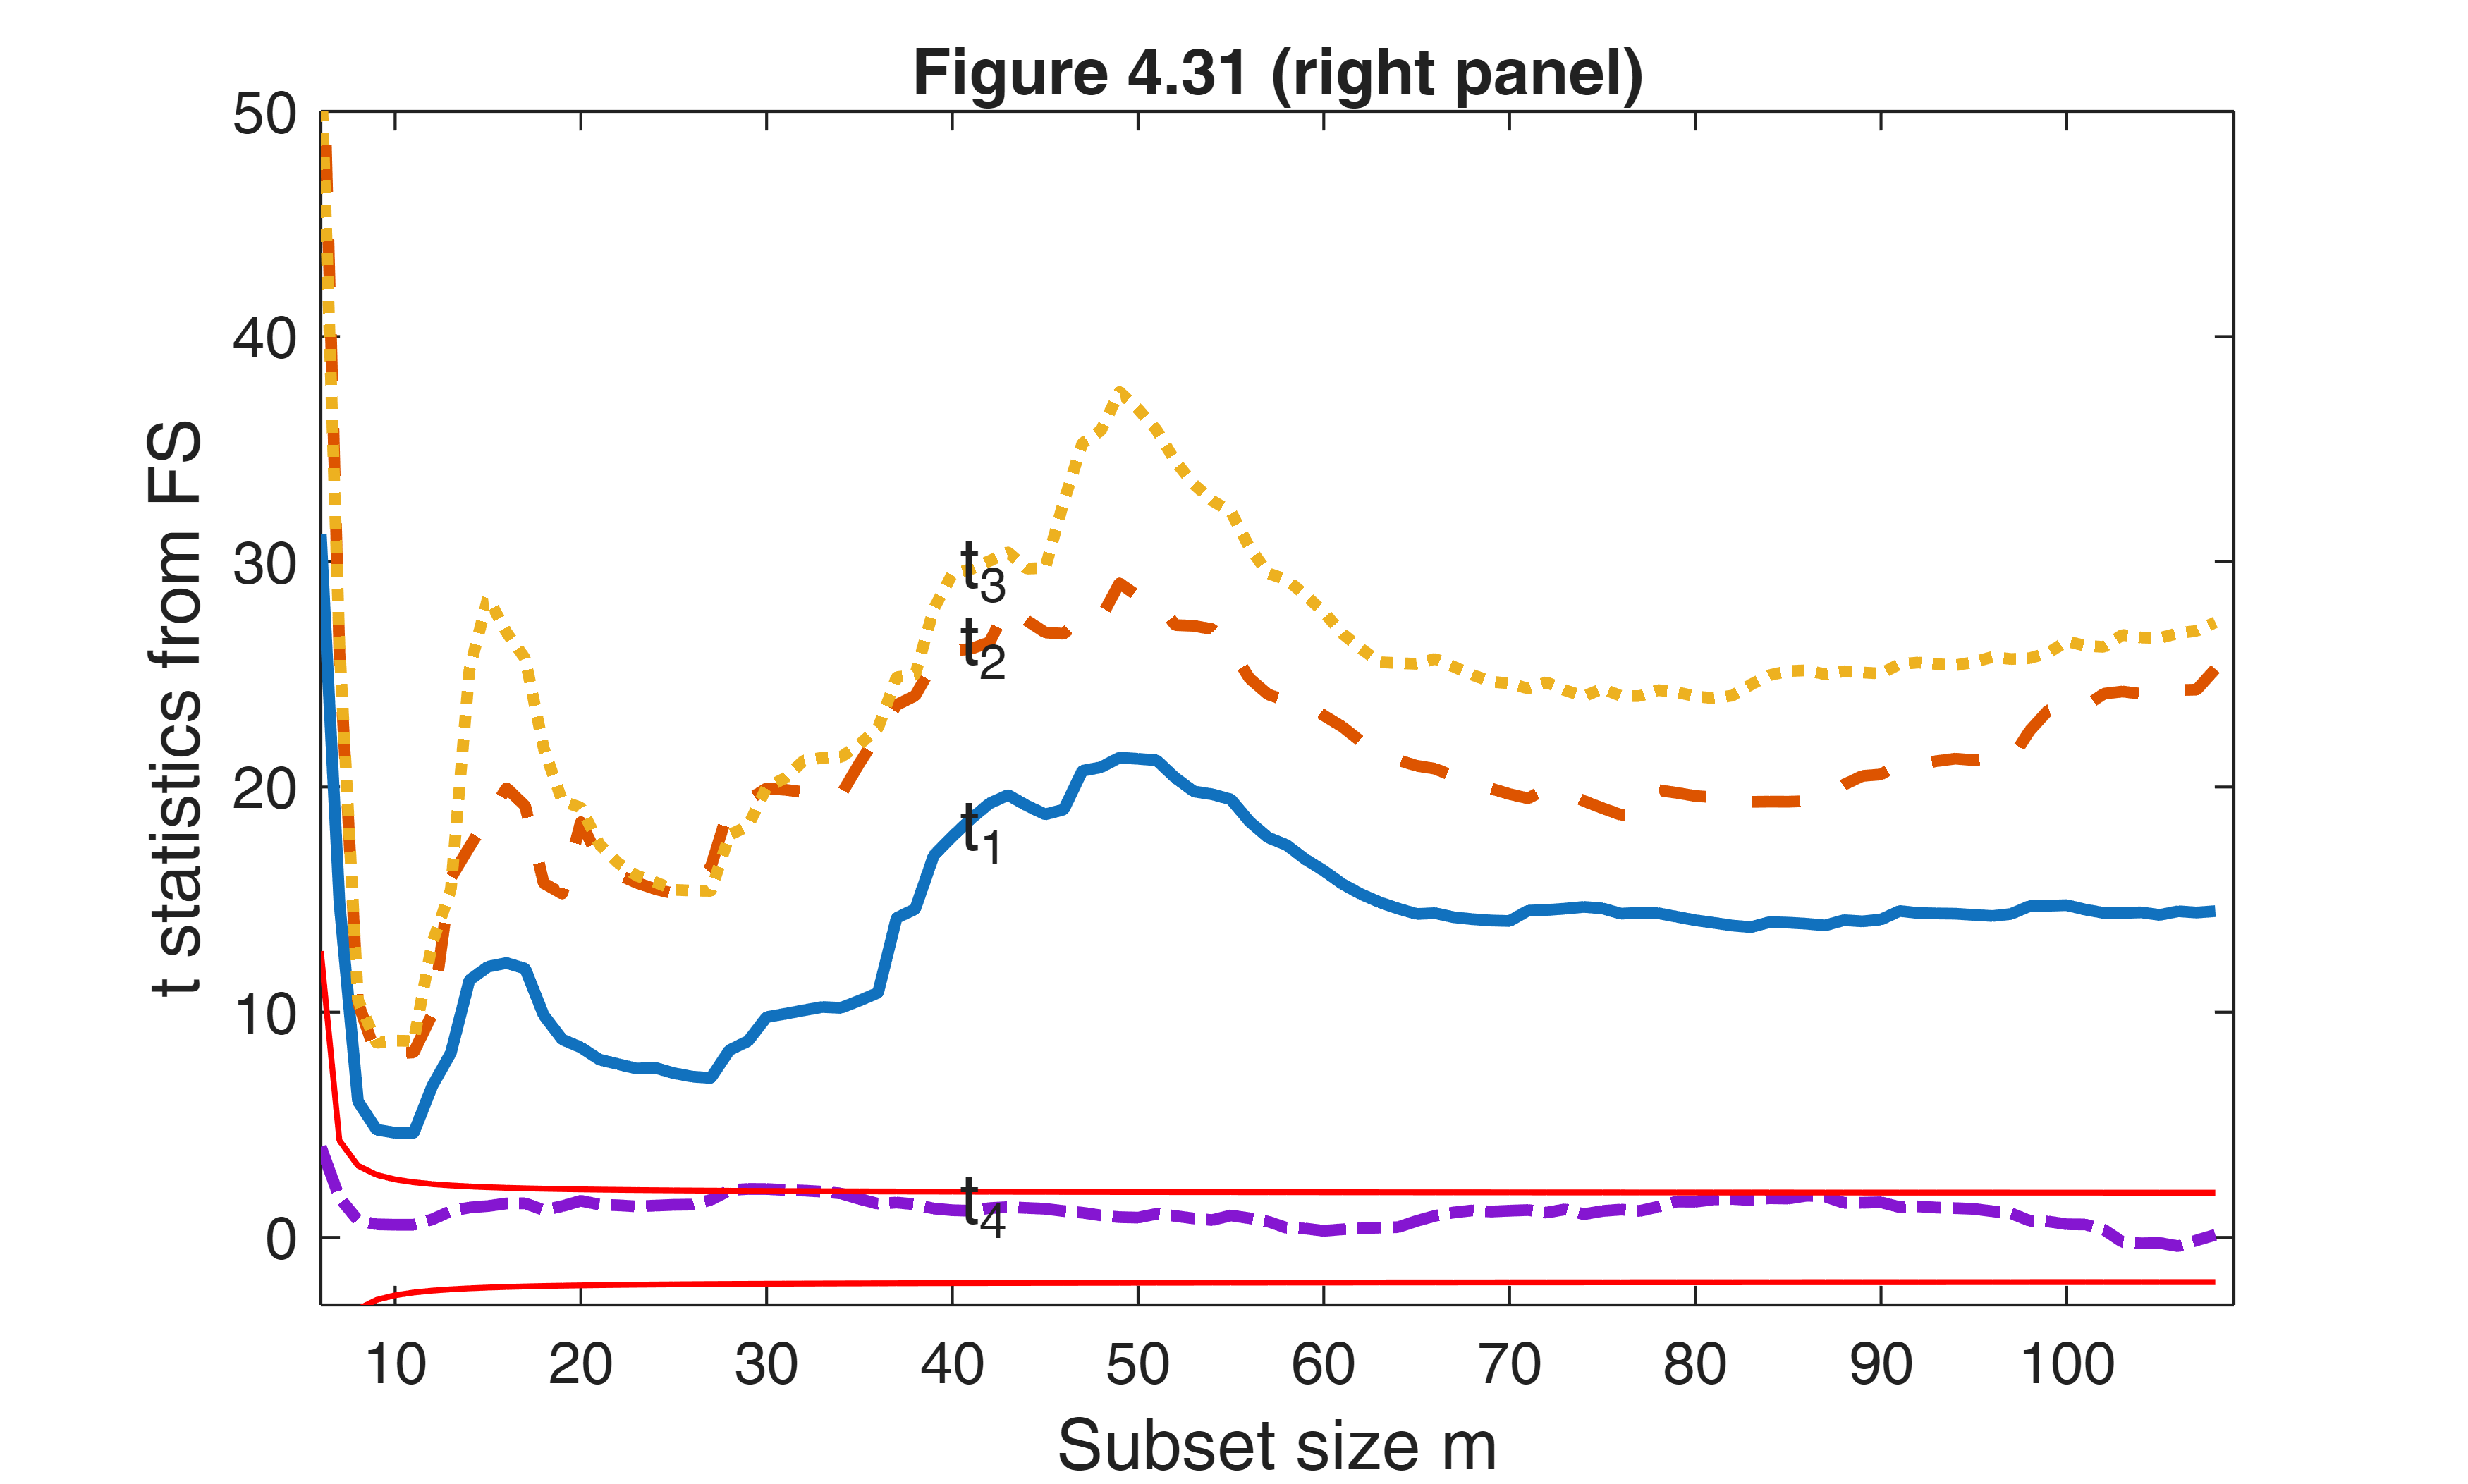

In [7]:
[outFS]=FSReda(y,X,outLXS.bs,'init',p+1);
fanplotFS(outFS,'conflev',0.95,'flabstep',40);

if prin==1
    % print to postscript
    print -depsc SPtmonitor.eps;
else
    title('Figure 4.31 (right panel)')
    set(gcf,"Name",'Figure 4.31 (right panel)')
end


## Create Figure 4.32 (with overlapping labels)

Forward Search Monitoring of traditional tstat



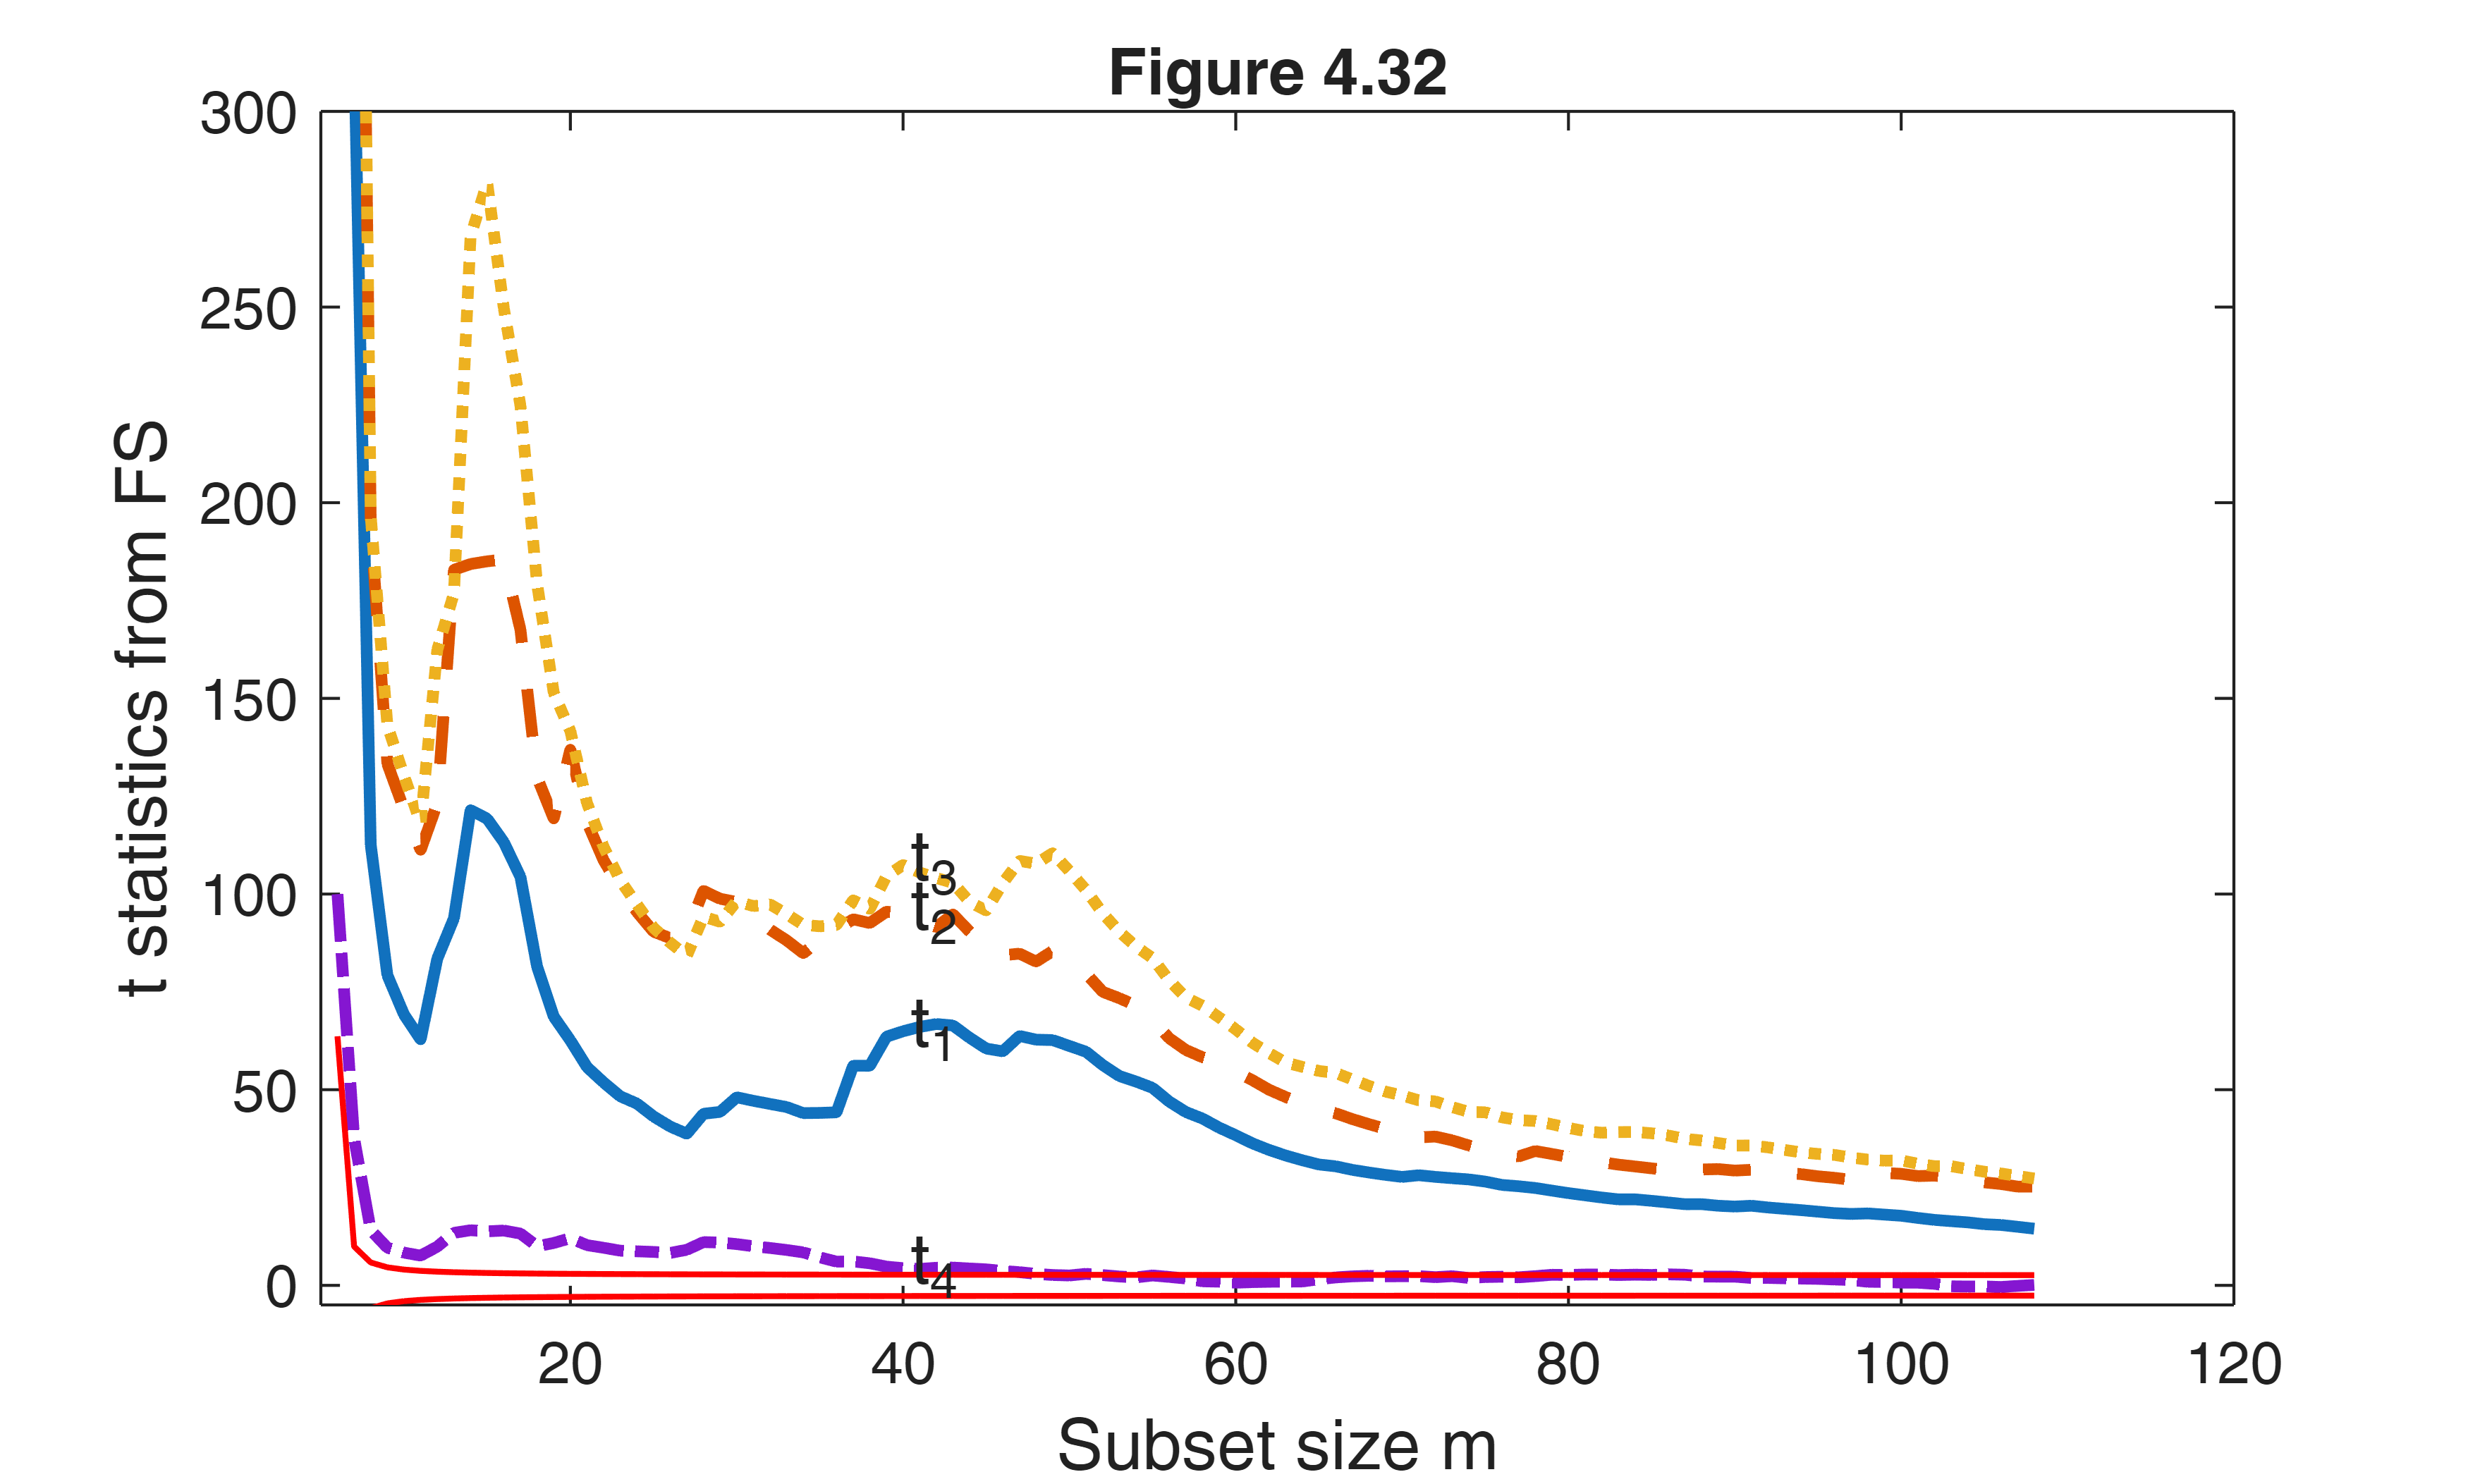

In [8]:
[outFS]=FSReda(y,X,outLXS.bs,'init',p+1,'tstat','trad');
fanplotFS(outFS,'ylimy',[-5 300],'tag','ploverl','xlimx',[5 120],'flabstep',40);

if prin==1
    % print to postscript
    print -depsc SPtmonitortrad.eps;
else
    title('Figure 4.32')
    set(gcf,"Name",'Figure 4.32')
end


## Create Figure 4.33

SP data Forward Search Monitoring of added tstat


In [9]:
figure
[out]=FSRaddt(y,X,'plots',1,'nameX',{'X1','X2','X3' 'X4'},'lwdenv',2,'lwdt',2);

Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.00 seconds 
Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.01 seconds


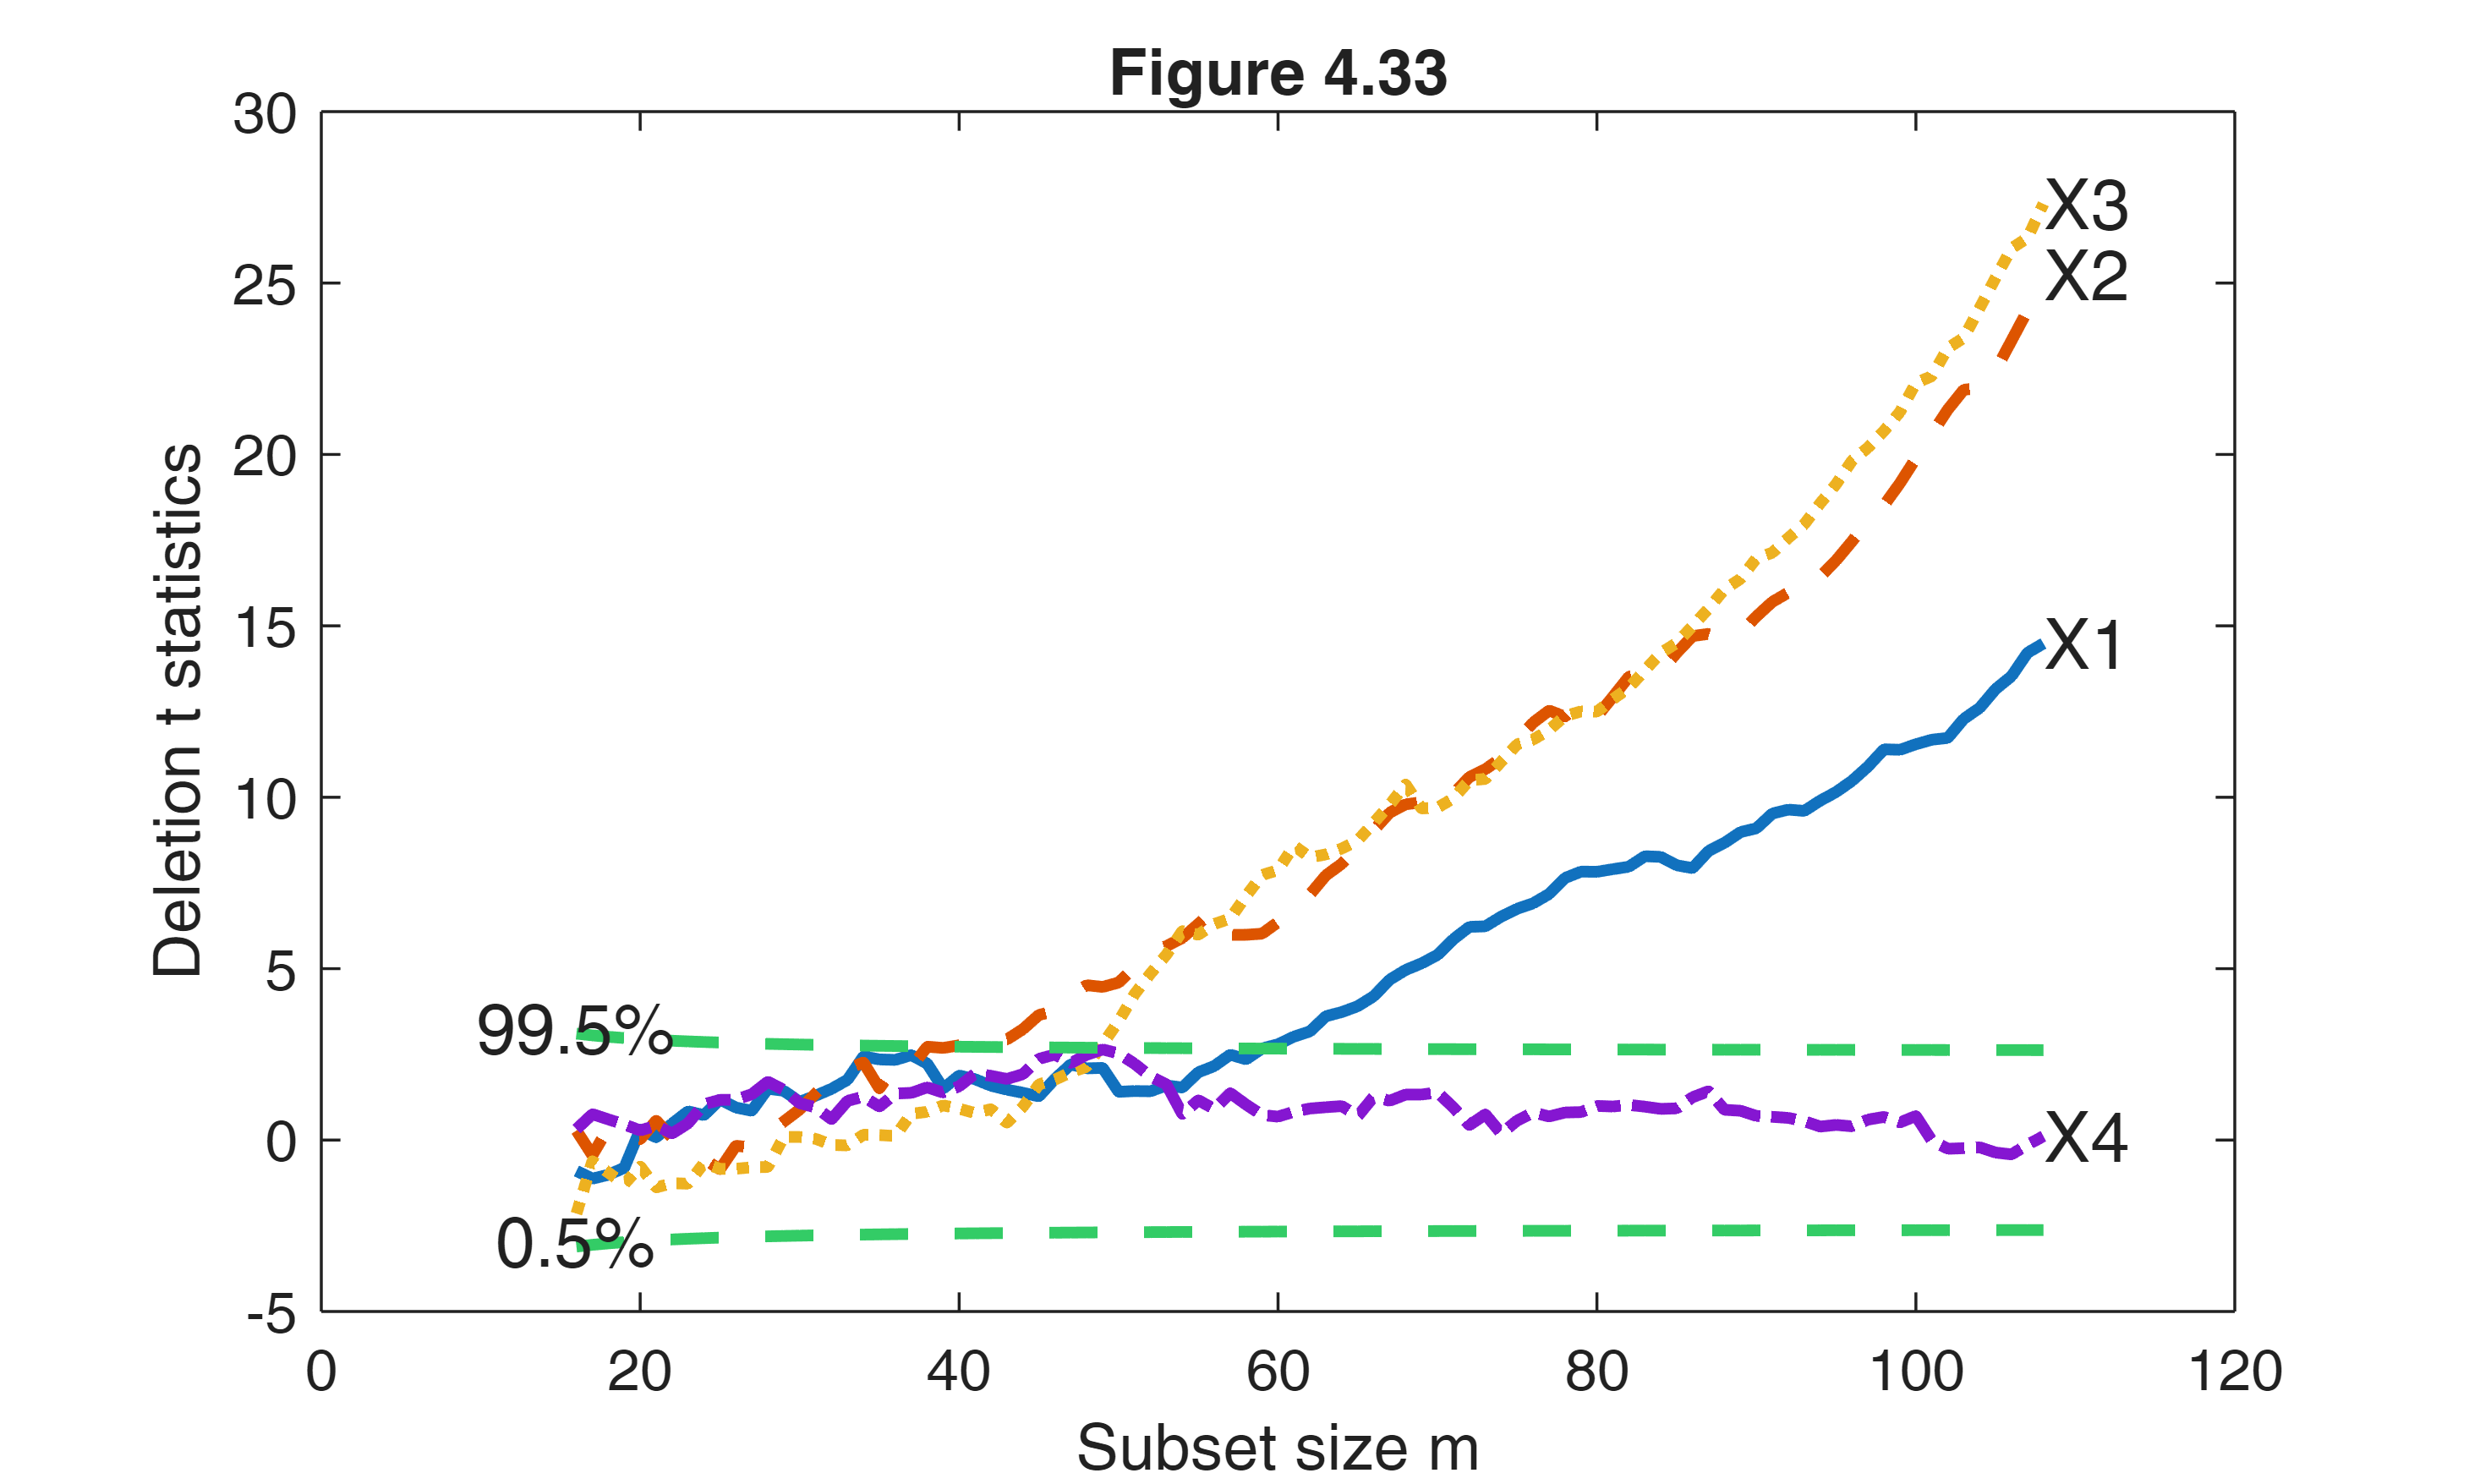

In [10]:

if prin==1
    % print to postscript
    print -depsc SPtmonitoradd.eps;
else
    title('Figure 4.33')
    set(gcf,"Name",'Figure 4.33')
end

In [11]:

%InsideREADME